In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import VarianceThreshold
import torch_geometric.transforms as T
from torch_geometric.datasets import IMDB
import matplotlib.pyplot as plt

## IMDB

In [2]:
FEATURE_SIZE = 10

In [3]:
dataset = IMDB(root='./imdb_data')
data = dataset[0]
movie = data['movie'].x.tolist()
df = pd.DataFrame(movie)
df['class'] = data['movie'].y.tolist()

In [4]:
def feature_selection_var(X, threshold=0.0):
    sel = VarianceThreshold(threshold=(threshold * (1 - threshold)))
    fitted_X = sel.fit_transform(X)
    imp_feat = pd.DataFrame(fitted_X)

    return imp_feat

Feature selection from Bag-of-Words features of Movie node

In [5]:
# Feature selection for Movie class 0
movie_class0 = df[df['class'] == 0].drop(['class'], axis = 1)
imp_feat0  = feature_selection_var(movie_class0, threshold=0.9575)
imp_feat0

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1132,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Feature selection for Movie class 1
movie_class1 = df[df['class'] == 1].drop(['class'], axis = 1)
imp_feat1 = feature_selection_var(movie_class1, threshold=0.932)
imp_feat1

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1580,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Feature selection for Movie class 2
# Feature selection for Movie class 2
class2 = df[df['class'] == 2].drop(['class'], axis=1)

imp_feat2 = feature_selection_var(class2, threshold=0.94)
imp_feat2.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Features of each class of Movie node sampled using Diffusion Models

In [9]:
class_path = '../../../../../../graph generator/diffusion models/sampled_features_diffusion/dependence/TabDDPM/imdb/variance/'

In [10]:
sampled0  = pd.DataFrame(np.load(class_path +'movie0_10.npy',allow_pickle=True)).iloc[:, : FEATURE_SIZE] 
sampled0.head()

,0,1,2,3,4,5,6,7,8,9
0,2.0,0.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2.0,3.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,2.0,3.0,2.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0
3,2.0,0.0,2.0,0.0,3.0,3.0,0.0,0.0,3.0,0.0
4,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0


In [11]:
sampled1  = pd.DataFrame(np.load(class_path +'movie1_10.npy',allow_pickle=True)).iloc[:, : FEATURE_SIZE] 
sampled1.head()

,0,1,2,3,4,5,6,7,8,9
0,4.0,0.0,0.0,3.0,4.0,5.0,2.0,0.0,0.0,4.0
1,4.0,2.0,3.0,3.0,4.0,5.0,0.0,0.0,0.0,4.0
2,0.0,2.0,3.0,3.0,4.0,5.0,2.0,0.0,0.0,0.0
3,4.0,2.0,0.0,3.0,4.0,5.0,0.0,0.0,0.0,4.0
4,4.0,0.0,3.0,0.0,4.0,5.0,0.0,0.0,0.0,4.0


In [12]:
sampled2  = pd.DataFrame(np.load(class_path +'movie2_10.npy',allow_pickle=True)).iloc[:, : FEATURE_SIZE] 
sampled2.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0
1,3.0,2.0,3.0,3.0,0.0,4.0,3.0,0.0,4.0,4.0
2,0.0,2.0,3.0,3.0,0.0,4.0,3.0,0.0,4.0,4.0
3,3.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,4.0
4,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [13]:
def cosine_sim(original,sampled):
    return cosine_similarity(original, sampled)

### Pairwise cosine similarity of all features for real and synthetic distributions

Movie class 0

In [14]:
real_class0= np.array(imp_feat0)
cosine_sim(real_class0,sampled0)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.46291005, 0.        , 0.        , ..., 0.41602515, 0.        ,
        0.38729833],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

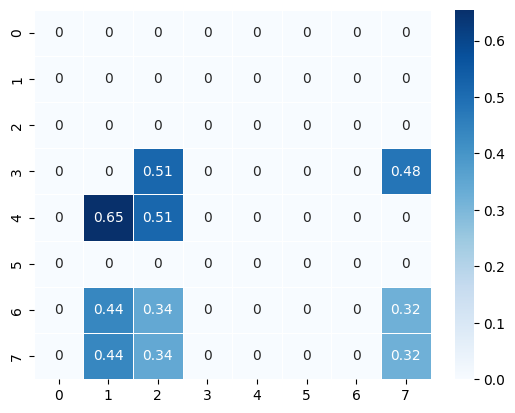

In [15]:
sns.heatmap(cosine_sim(real_class0[:8],sampled0[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [16]:
avg_cossim_class0 = np.mean(cosine_sim(real_class0,sampled0))
avg_cossim_class0

0.07546367703341073

Movie class 1

In [17]:
real_class1= np.array(imp_feat1)
cosine_sim(real_class1,sampled1)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.30779351, 0.36650833, ..., 0.        , 0.        ,
        0.33752637],
       [0.        , 0.20519567, 0.24433889, ..., 0.21566555, 0.23249528,
        0.22501758],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

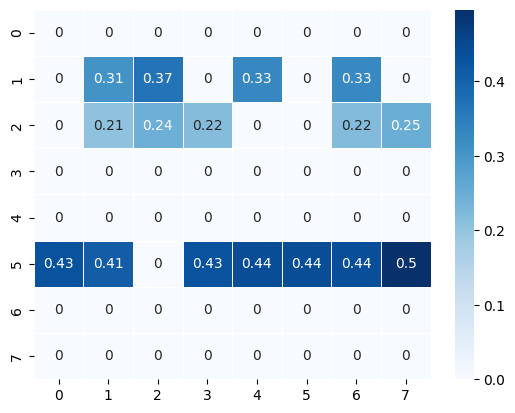

In [18]:
sns.heatmap(cosine_sim(real_class1[:8],sampled1[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [19]:
avg_cossim_class1 = np.mean(cosine_sim(real_class1,sampled1))
avg_cossim_class1

0.09439533857560001

Movie class 2

In [20]:
real_class2= np.array(imp_feat2)
cosine_sim(real_class2,sampled2)

array([[0.6       , 0.31980107, 0.33752637, ..., 0.35355339, 0.        ,
        0.40089186],
       [0.        , 0.52764485, 0.5568901 , ..., 0.58333333, 0.        ,
        0.66143783],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

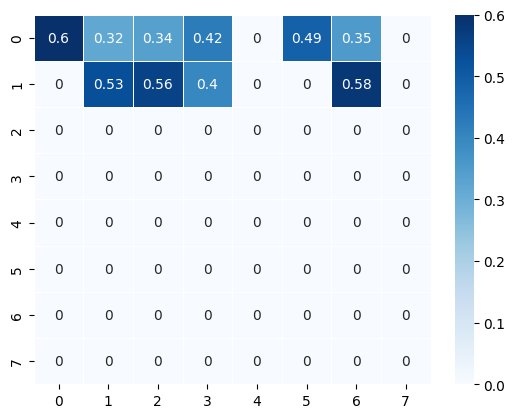

In [21]:
sns.heatmap(cosine_sim(real_class2[:8],sampled2[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [22]:
avg_cossim_class2 = np.mean(cosine_sim(real_class2,sampled2))
avg_cossim_class2

0.08249924544782995

In [23]:
(avg_cossim_class0 + avg_cossim_class1 +avg_cossim_class2)/3

0.08411942035228022